# ניתוח נתונים Metro Bike- מטרת הניתוח שלנו על בסיס הנתונים של חברת metro bike הינו להסיק מסקנות מניתוח הנתונים על השימוש בשירותי השכרת האופניים של החברה! 

מגישים:
איליי שטרית 211875158
אריאל שלמה 207813486
אלעד בן משה 206964421

https://www.kaggle.com/datasets/khoshbayani/metro-trips-dataset


רקע על החברה
– חברת metro-bike 
הינה חברת להשכרת אופניים בלוס אנג׳לס בתחנות המטרו הפזורות בעיר , תושבים / אזרחים יכולים להתנייד בעזרתן ולהחנות אותן ברחבי העיר בנקודות המטרו.


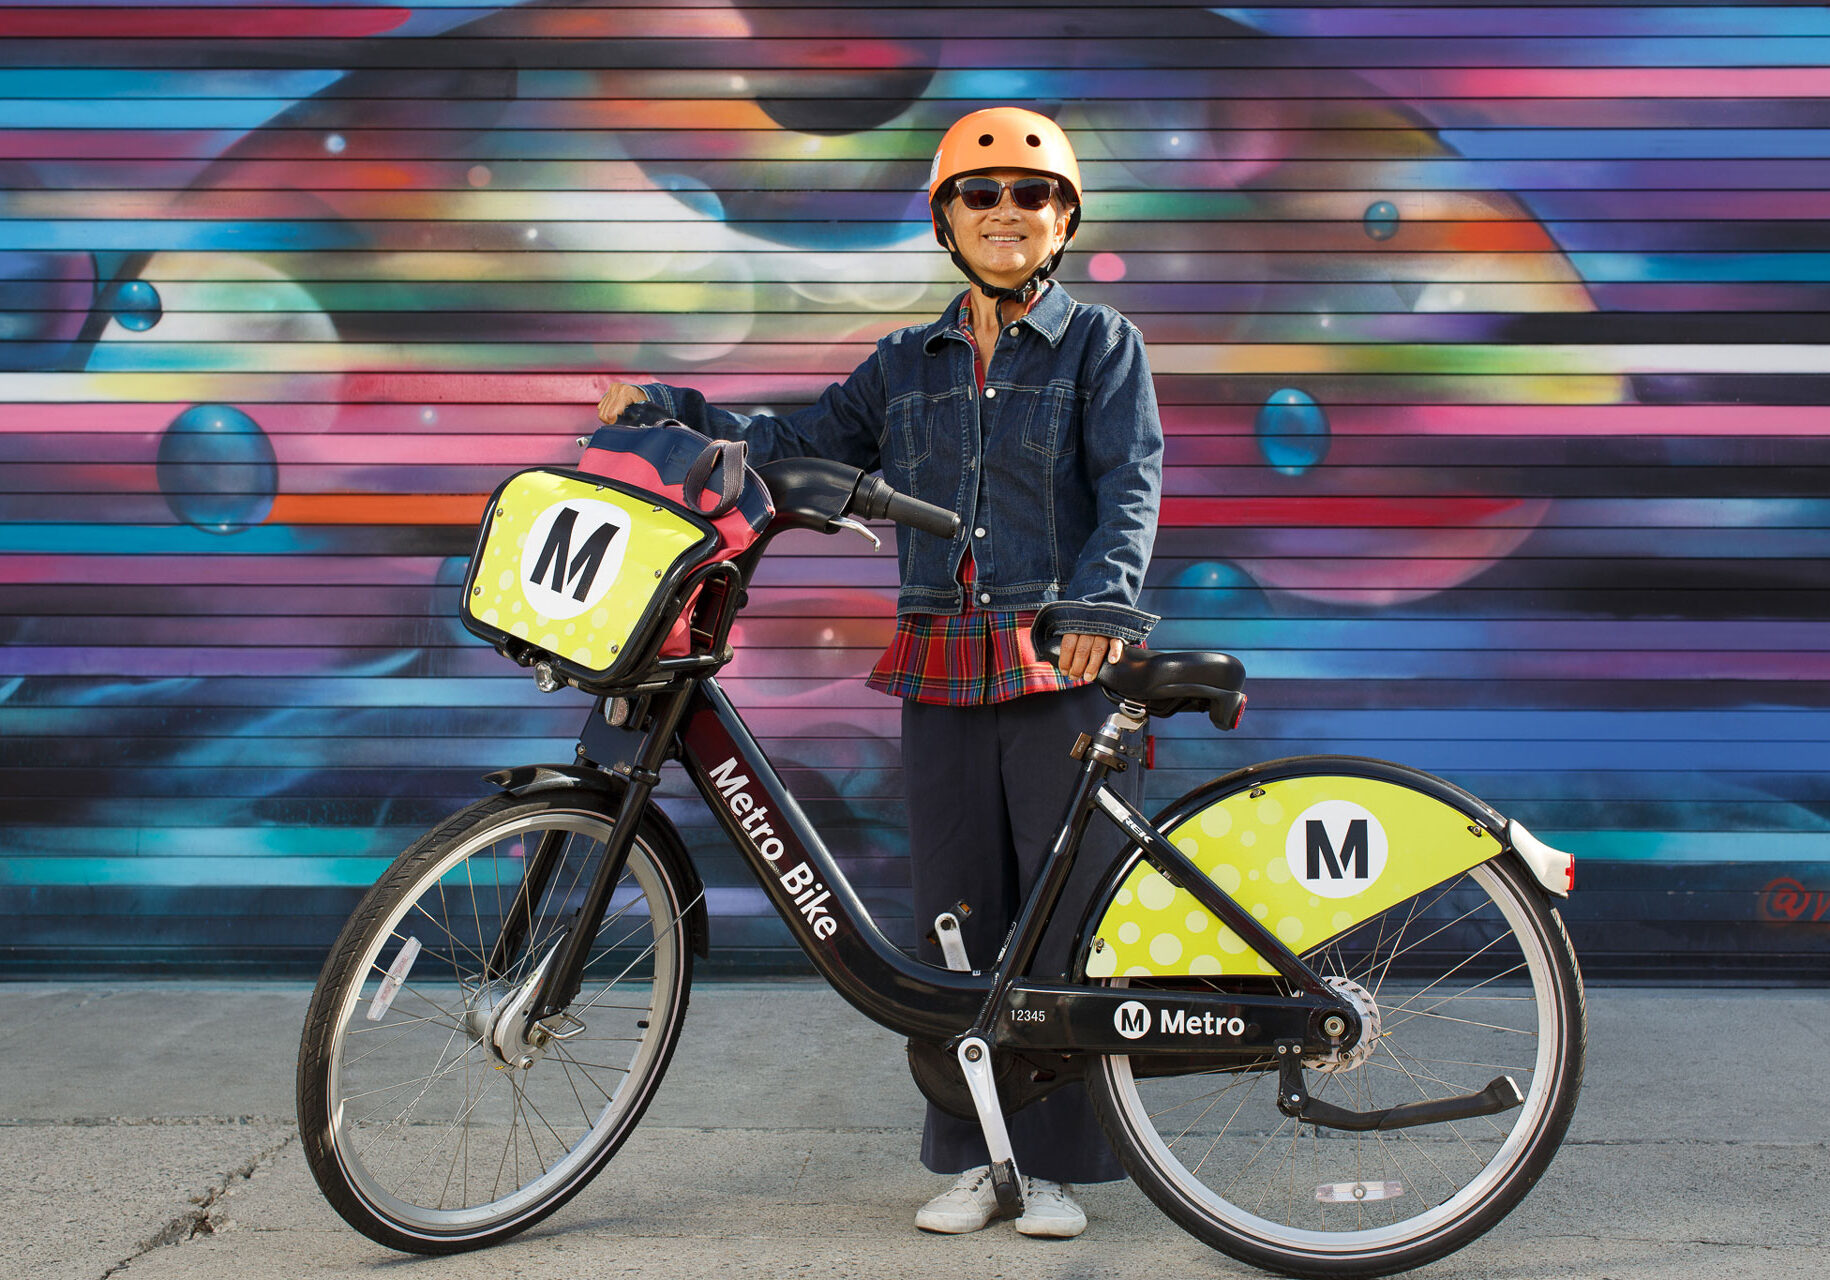

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('metro_trips.csv', parse_dates=['start_time', 'end_time'])

# המרת עמודות התאריך לסוג נתון תאריך
df['start_time'] = pd.to_datetime(df['start_time'], dayfirst=True)
df['end_time'] = pd.to_datetime(df['end_time'], dayfirst=True)


In [2]:


df.head(10)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,249955060,41,2023-04-01 00:00:00,2023-04-01 00:41:00,4643,34.072620,-118.449440,4643,34.072620,-118.449440,22398,30,Round Trip,Monthly Pass,electric
1,249954734,11,2023-04-01 00:00:00,2023-04-01 00:11:00,4643,34.072620,-118.449440,4613,34.069752,-118.445351,22304,30,One Way,Monthly Pass,electric
2,249954667,2,2023-04-01 00:02:00,2023-04-01 00:04:00,4523,34.068748,-118.309280,4538,34.065430,-118.308823,6591,30,One Way,Monthly Pass,standard
3,249954776,12,2023-04-01 00:03:00,2023-04-01 00:15:00,3034,34.042061,-118.263382,4491,34.047440,-118.247940,13897,365,One Way,Annual Pass,standard
4,249954777,11,2023-04-01 00:04:00,2023-04-01 00:15:00,3056,34.037460,-118.265381,4491,34.047440,-118.247940,15488,30,One Way,Monthly Pass,standard
5,249954826,15,2023-04-01 00:04:00,2023-04-01 00:19:00,4538,34.065430,-118.308823,4538,34.065430,-118.308823,20027,30,Round Trip,Monthly Pass,standard
6,249954907,21,2023-04-01 00:05:00,2023-04-01 00:26:00,4214,33.995560,-118.481552,4204,33.988419,-118.451630,6165,30,One Way,Monthly Pass,standard
7,249954778,5,2023-04-01 00:10:00,2023-04-01 00:15:00,4511,34.056278,-118.231773,3022,34.046070,-118.233093,14911,365,One Way,Annual Pass,standard
8,249954920,16,2023-04-01 00:11:00,2023-04-01 00:27:00,4613,34.069752,-118.445351,4614,34.073650,-118.439842,24228,30,One Way,Monthly Pass,electric
9,249955057,24,2023-04-01 00:16:00,2023-04-01 00:40:00,4537,34.098228,-118.338821,4537,34.098228,-118.338821,22192,1,Round Trip,One Day Pass,electric


# שלב ג - בדיקת הנתונים



In [3]:
# בדיקת ערכים חסרים בכל עמודה
missing_values = df.isnull().sum()

# חישוב אחוז הערכים החסרים
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_data_summary)

                     Missing Values  Percentage
trip_id                           0    0.000000
duration                          0    0.000000
start_time                        0    0.000000
end_time                          0    0.000000
start_station                     0    0.000000
start_lat                        19    0.017362
start_lon                        19    0.017362
end_station                       0    0.000000
end_lat                        1741    1.590884
end_lon                        1741    1.590884
bike_id                           0    0.000000
plan_duration                     0    0.000000
trip_route_category               0    0.000000
passholder_type                   0    0.000000
bike_type                         0    0.000000


# שלב ד - הוספת עמודות מחושבות ושמירה בדאטה פריים


In [4]:

def classify_time_of_day(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 16:
        return 'noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'evening'
    elif 21 <= hour or hour < 3:
        return 'night'
    elif 3 <= hour < 6:
        return 'In the morning'

df['start_hour'] = df['start_time'].dt.hour
df['time_of_day_category'] = df['start_hour'].apply(classify_time_of_day)


df.head(500)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_hour,time_of_day_category
0,249955060,41,2023-04-01 00:00:00,2023-04-01 00:41:00,4643,34.072620,-118.449440,4643,34.072620,-118.449440,22398,30,Round Trip,Monthly Pass,electric,0,night
1,249954734,11,2023-04-01 00:00:00,2023-04-01 00:11:00,4643,34.072620,-118.449440,4613,34.069752,-118.445351,22304,30,One Way,Monthly Pass,electric,0,night
2,249954667,2,2023-04-01 00:02:00,2023-04-01 00:04:00,4523,34.068748,-118.309280,4538,34.065430,-118.308823,6591,30,One Way,Monthly Pass,standard,0,night
3,249954776,12,2023-04-01 00:03:00,2023-04-01 00:15:00,3034,34.042061,-118.263382,4491,34.047440,-118.247940,13897,365,One Way,Annual Pass,standard,0,night
4,249954777,11,2023-04-01 00:04:00,2023-04-01 00:15:00,3056,34.037460,-118.265381,4491,34.047440,-118.247940,15488,30,One Way,Monthly Pass,standard,0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,250096106,27,2023-04-01 14:25:00,2023-04-01 14:52:00,4560,34.017368,-118.420601,4205,33.993771,-118.453667,23485,30,One Way,Monthly Pass,electric,14,noon
496,250095066,9,2023-04-01 14:25:00,2023-04-01 14:34:00,4206,33.998341,-118.461014,4207,34.000881,-118.468910,5831,30,One Way,Monthly Pass,standard,14,noon
497,250095367,13,2023-04-01 14:26:00,2023-04-01 14:39:00,4476,34.082520,-118.272720,4220,34.074829,-118.258728,14936,30,One Way,Monthly Pass,standard,14,noon
498,250096109,27,2023-04-01 14:26:00,2023-04-01 14:53:00,4538,34.065430,-118.308823,4584,34.094349,-118.326363,14086,1,One Way,One Day Pass,standard,14,noon


# שלב ה - בחינת סוג העמודה


trip_id: קטגוריאלי
duration: רציף
start_time: רציף
end_time: רציף
start_station: קטגוריאלי
start_lat: רציף
start_lon: רציף
end_station: קטגוריאלי
end_lat: רציף
end_lon: רציף
bike_id: קטגוריאלי
plan_duration: רציף
trip_route_category: קטגוריאלי
passholder_type: קטגוריאלי
bike_type: קטגוריאלי
start_hour: קטגוריאלי
time_of_day_category: קטגוריאלי


# שלב ו - מענה על שאלות מחלק א

# שאלה מספר 1 - מה כמות האופניים שהחברה מחזיקה בלוס אנג׳לס

In [5]:
# חישוב כמות האופניים הייחודיות
unique_bikes = df['bike_id'].nunique()

# הצגת התוצאה
print(f"מספר האופניים הייחודיות: {unique_bikes}")


מספר האופניים הייחודיות: 1932


# מסקנה שאלה 1: 
לחברה קיימם 1,932 יחידות של אופניים הפרוסים בכל רחבי המטרו בלוס אנג׳לס

# שאלה מספר 2 - מה כמות השימושים במטרו בייק בכל חודש באחוזים

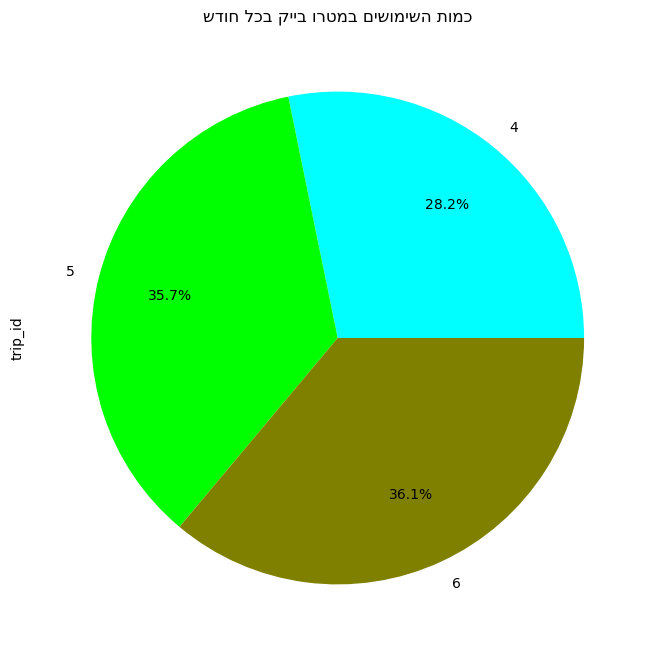

In [6]:
df['month'] = df['start_time'].dt.month

monthly_usage = df.groupby('month')['trip_id'].count().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    pctdistance=0.7,
     colors=('#00FFFF', '#00FF00', '#808000'),
    title='כמות השימושים במטרו בייק בכל חודש'[::-1],
)

# מסקנה שאלה 2
מניתוח הנתונים והצגתם בתרשים עוגה אנו רואים שהחודשים בהם השתמשו הכי הרבה בשירותי החברה הינם חודשי מאי - יוני - תקופה זו הינה תקופת האביב בלוס אנג׳לס - מסקנה זו יכולה להעיד שבעונות נוחות מבחינת מזג אוויר יש יותר אנשים שמשכירים אופניים

# שאלה מספר 3 הצגת התפלגות השימוש באופניים לפי חודש

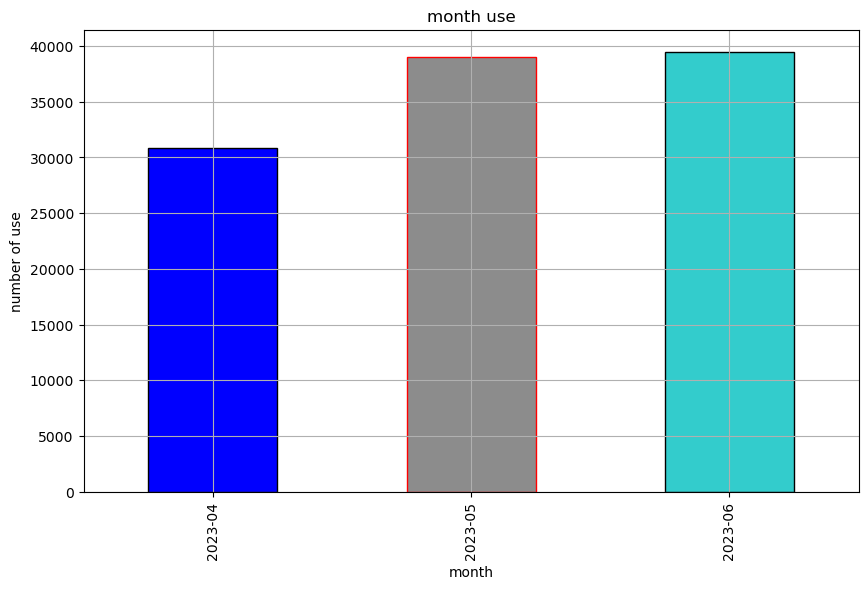

In [7]:
df['month'] = df['start_time'].dt.to_period('M')


monthly_usage = df.groupby('month')['trip_id'].count().plot.bar(color=['blue','0.55','#33cccc'],
                                                            edgecolor=['black','red'],
                                                            figsize=(10, 6),
                                                            linewidth=1,
                                                            title='month use', 
                                                            xlabel='month', 
                                                            ylabel='number of use',
                                                            grid=True
                                                               )

# מסקנה שאלה 3
בהמשך לשאלה 2 אנחנו מציגים את התפלגות הרוכבים בכל חודש ומסיקים שבחודשי יוני מאי כמות השימושים עולה מחודש אפריל והחודש בוא כמות השימושים הינה הגבוהה ביותר הוא בחודש יוני    

# 4. Top 5 start station

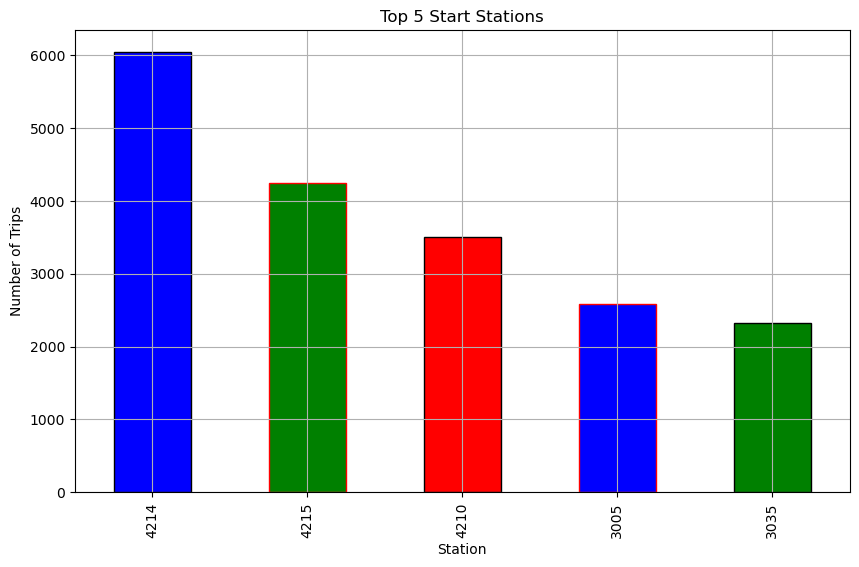

In [8]:
top_start_stations = df['start_station'].value_counts().head(5).plot.bar(color=['blue','green','red'],
                                                            edgecolor=['black','red'],
                                                            figsize=(10, 6),
                                                            linewidth=1,
                                                            title='Top 5 Start Stations', 
                                                            xlabel='Station', 
                                                            ylabel='Number of Trips',
                                                            grid=True
                                                                         
                                                               )


# מסקנה שאלה 4
התחנות השכיחות ביותר 4214 ,4215 נמצאות כנראה באזורים מרכזיים או הומים בעיר, דבר המעיד על חשיבות מיקום תחנות ההשכרה. מידע זה יכול לעזור בהחלטות עסקיות להוסיף תחנות נוספות או לשדרג תחנות קיימות. 

# 5. Top 5 end station

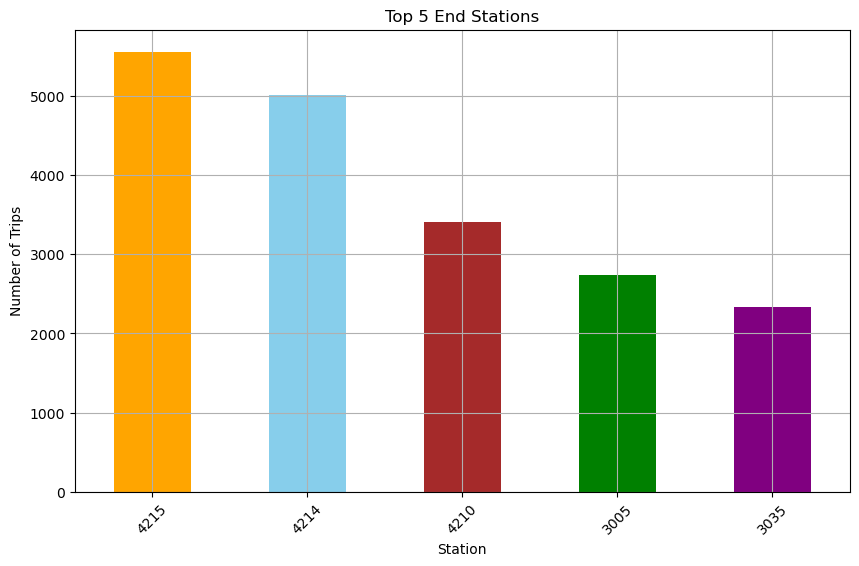

In [9]:
top_end_stations = df['end_station'].value_counts().head(5).plot.bar(color=['orange','skyblue','brown','green','purple'],
                                                          
                                                            figsize=(10, 6),
                                                            linewidth=1,
                                                            title='Top 5 End Stations', 
                                                            xlabel='Station', 
                                                            ylabel='Number of Trips',
                                
                                                            grid=True
                                                               )


plt.xticks(rotation=45)
plt.show()



# מסקנה שאלה 5:
תחנות הסיום השכיחות ביותר גם הינם 4215 ,4214 נמצאות במקומות מרכזיים, קרוב לוודאי שמסיבות דומות לתחנות ההתחלה. ניתוח זה מספק הבנה טובה יותר על דפוסי השימוש ומיקום התחנות הפופולריות.
 


# 6. התפלגות רכישות המנוי לפי סוג מנוי

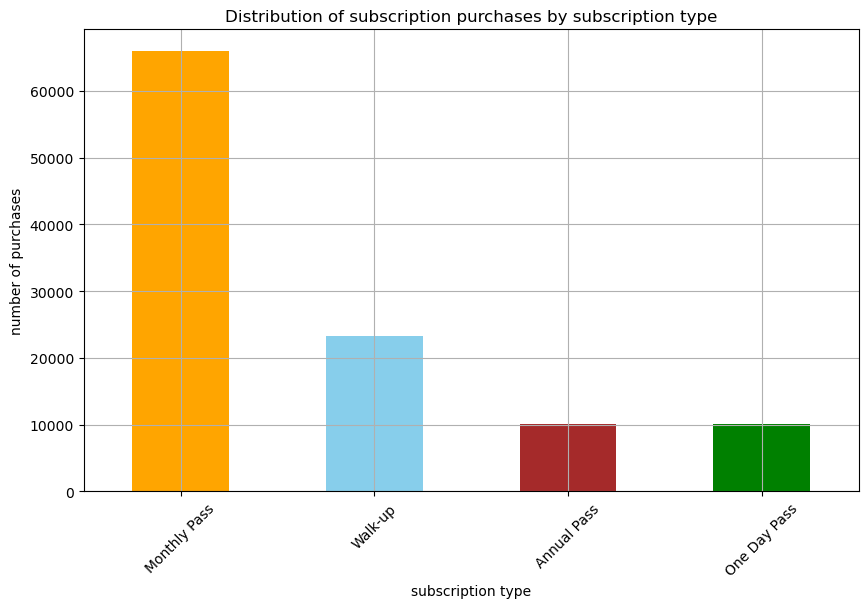

In [10]:
# חישוב התפלגות רכישות המנויים לפי סוג מנוי והצגת התפלגות רכישות המנויים בגר
passholder_distribution = df['passholder_type'].value_counts().plot.bar(color=['orange','skyblue','brown','green','purple'],
                                                          
                                                            figsize=(10, 6),
                                                            linewidth=1,
                                                            title='Distribution of subscription purchases by subscription type', 
                                                            xlabel='subscription type', 
                                                            ylabel='number of purchases',
                                                            
                                
                                                            grid=True
                                                               )


plt.xticks(rotation=45)


plt.show()


# מסקנה שאלה 6:
רוב הרכישות נעשות על ידי מנויים מסוג מסוים חודשי כפי שרואים בתרשים. מסקנה זו יכולה לסייע בהבנה איזה סוג מנוי הכי פופולרי ולפתח הצעות או מבצעים מותאמים לאותו סוג מנוי.

# 7. התפלגות סוגי אופניים

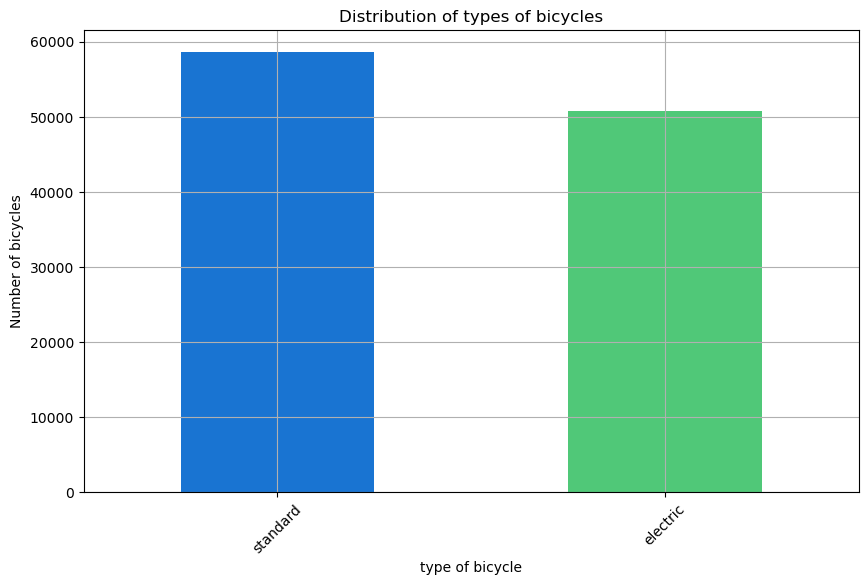

In [11]:
# חישוב התפלגות סוגי האופניים והצגת התפלגות סוגי האופניים בגרף
bike_type_distribution = df['bike_type'].value_counts().plot.bar(color=['#1974D2','#50C878'],
                                                          
                                                            figsize=(10, 6),
                                                            linewidth=1,
                                                            title='Distribution of types of bicycles', 
                                                            xlabel='type of bicycle', 
                                                            ylabel='Number of bicycles',
                                                            
                                
                                                            grid=True
                                                               )



plt.xticks(rotation=45)
plt.show()


# מסקנה שאלה 7
ניתן לראות שאופניים רגילות הן הנפוצות ביותר , מה שמעיד על העדפות המשתמשים. ניתוח זה יכול לסייע בהחלטות לגבי הגדלת מלאי אופניים מסוג זה ושיפור התחזוקה שלהם במקביל הורדת מלאי האופניים החשמליים שעלותם גבוהה בהרבה ובכך לחסוך כסף.

# 8. האם יש קשר בין אופי התוכנית (יומי,חודשי,שנתי) לסוג האופניים שבהם משתמשים הלקוחות

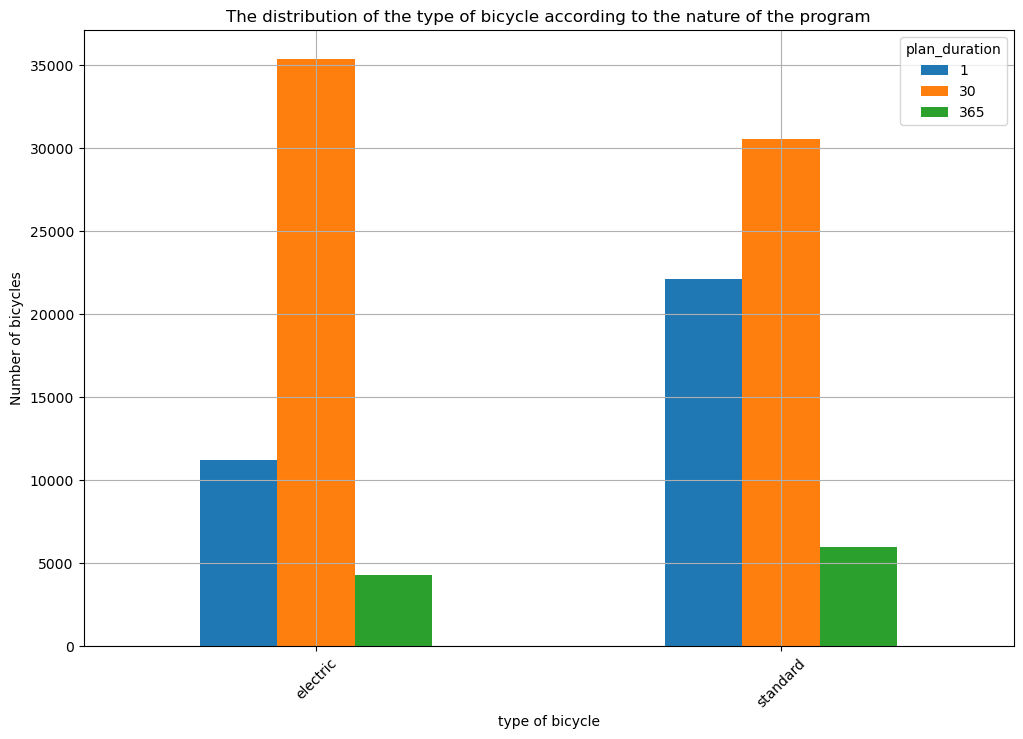

In [12]:
bike_plan_crosstab = pd.crosstab(df['bike_type'], df['plan_duration']).plot.bar(
    figsize=(12, 8),
    title='The distribution of the type of bicycle according to the nature of the program',
    xlabel='type of bicycle',
    ylabel='Number of bicycles',
    grid=True
)

plt.xticks(rotation=45)


plt.show()


# מסקנה שאלה 8
קיים קשר בין אופי התוכנית לסוג האופניים שבהם משתמשים הלקוחות. ניתן לראות שלקוחות אשר עושים מנוי יומי בחורים להשתמש יותר באופניים רגילות משמעותית יותר ממנוי יומי באופניים חשמליים נתון זה יכול לעזור בפיתוח חבילות מנויים מותאמות לפי סוג האופניים המועדף

# 9. מה זמן השימוש הממוצע באופניים

In [13]:
average_duration = df['duration'].mean()

print(f"זמן השימוש הממוצע באופניים: {average_duration:.2f} דקות")


זמן השימוש הממוצע באופניים: 33.79 דקות


# מסקנה שאלה 9
זמן השימוש הממוצע הוא נתון חשוב להבנת דפוסי השימוש של הלקוחות, ויכול לסייע בתכנון תחזוקה ושירותים נוספים.

# 10. שעת ההתחלה השכיחה - באיזה שעה רוב השכרות האופניים מתרחשות

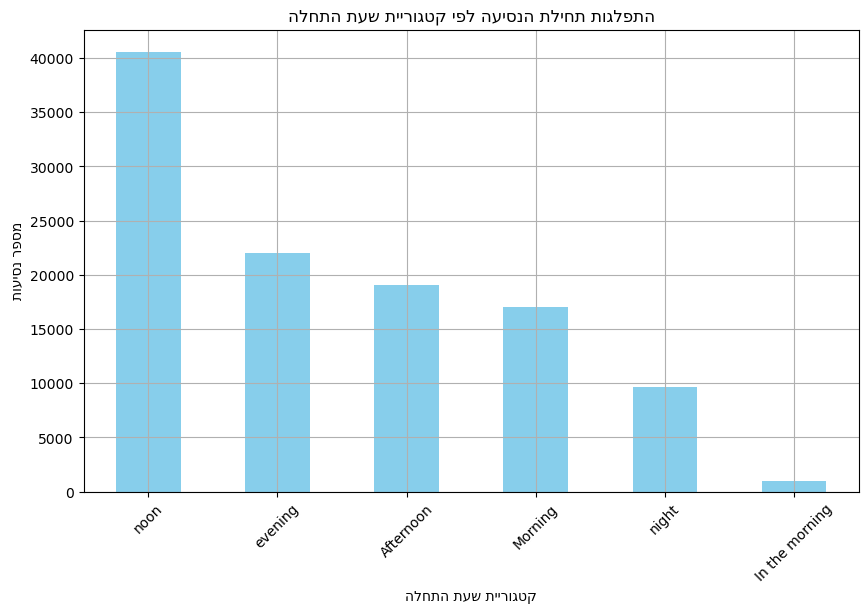

In [14]:
time_of_day_distribution = df['time_of_day_category'].value_counts().plot.bar(
    color='skyblue',
    figsize=(10, 6),
    title='התפלגות תחילת הנסיעה לפי קטגוריית שעת התחלה'[::-1], 
    xlabel='קטגוריית שעת התחלה'[::-1], 
    ylabel='מספר נסיעות'[::-1],
    grid=True
)
plt.xticks(rotation=45)

plt.show()


# מסקנה שאלה 10
רוב השכרות האופניים מתרחשות בצהריים ובערב. נתון זה יכול לעזור בהבנה מתי להגדיל את זמינות האופניים ולשפר את השירות בשעות העומס.

# 11. סוג המסלול הנפוץ ביותר (מעגלי/כיוון אחד)

In [15]:
# חישוב סוג המסלול הנפוצה ביותר
most_common_route = df['trip_route_category'].mode()[0]

# הצגת התוצאה
print(f"סוג המסלול הנפוצה ביותר: {most_common_route}")


סוג המסלול הנפוצה ביותר: One Way


# מסקנה שאלה 11
מהניתוח קיבלנו שסוג המסלול הנפוץ ביותר הוא כיוון אחד, נתון זה חשוב לתכנון המסלולים והתחנות בעתיד.



# שאלה 12 - משך זמן השימוש הכולל בכל קטגוריה :בוקר, צהריים, הצהריים,ערב,לילה,לפנות  בוקר 

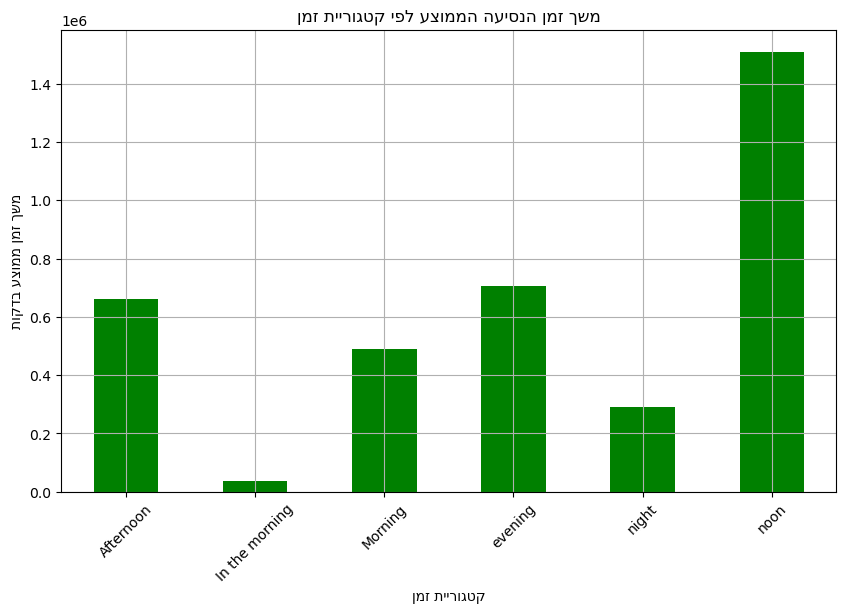

In [16]:

avg_duration_by_time_of_day = df.groupby('time_of_day_category')['duration'].sum().plot.bar(
    color='green',
    figsize=(10, 6),
    title='משך זמן הנסיעה הממוצע לפי קטגוריית זמן'[::-1], 
    xlabel='קטגוריית זמן'[::-1], 
    ylabel='משך זמן ממוצע בדקות'[::-1],
    grid=True
)

plt.xticks(rotation=45)
plt.show()

# ציר הוי מופיע ביחס אחד ל100,000

# מסקנה שאלה 12
ניתן לראות בבירור שבשעות הצהריים אלו השעות עם זמן השימוש הממוצע הגבוהה ביותר ,בעקבות תוצאה זו החלטנו לרשום עוד עוד כדי להבין מדוע זמן השימושים הממוצעים נמוך - נבדוק מה הזמן הנפוץ ביותר בעמודת duration 


# שאלה 13 - מהו ממוצע משך זמן השימוש באופניים על פי סוג אופניים


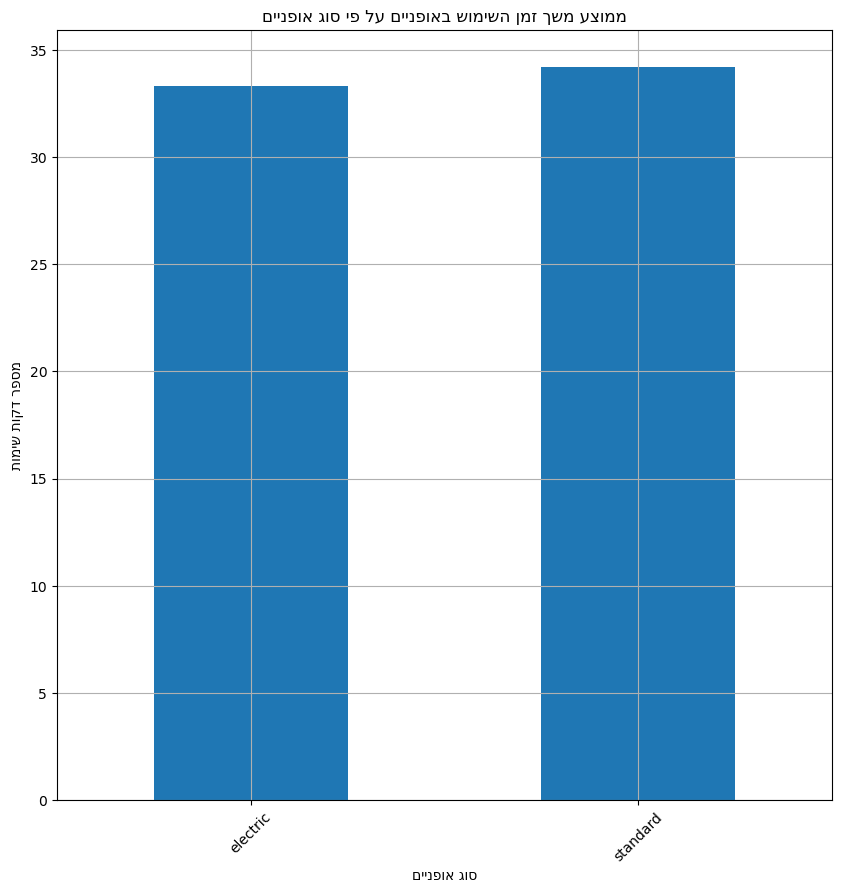

In [17]:
average_duration_by_bike_type = df.groupby('bike_type')['duration'].mean().plot.bar(
    figsize=(10, 10),
    title='ממוצע משך זמן השימוש באופניים על פי סוג אופניים'[::-1], 
    xlabel='סוג אופניים'[::-1], 
    ylabel='מספר דקות שימות'[::-1],
    
    grid=True

)
plt.xticks(rotation=45)

plt.show()

# מסקנה שאלה 13
ניתן לראות את ההבדלים בממוצע משך הזמן של השימוש באופניים שכן ממוצע השימוש כמעט זהה בדקות. ניתן להבחין שיש לאופניים הרגילים שימוש זמן ממוצע גבוהה יותר במעט מאשר האופניים החשמליים, אפשר להסיק מזה שלמרות שאנשים צריכים לדווש ולהתאמץ יותר להגיע ממקום למקום בעזרתם כנראה שלאופניים חשמליים אין יתרון בחשיבות הדבר ללקוח (בהתחשב ואין הבדלי מחירים בין השניים).

# שאלה 14- מהו ממוצע מספר הנסיעות ביום לפי סוג המנוי

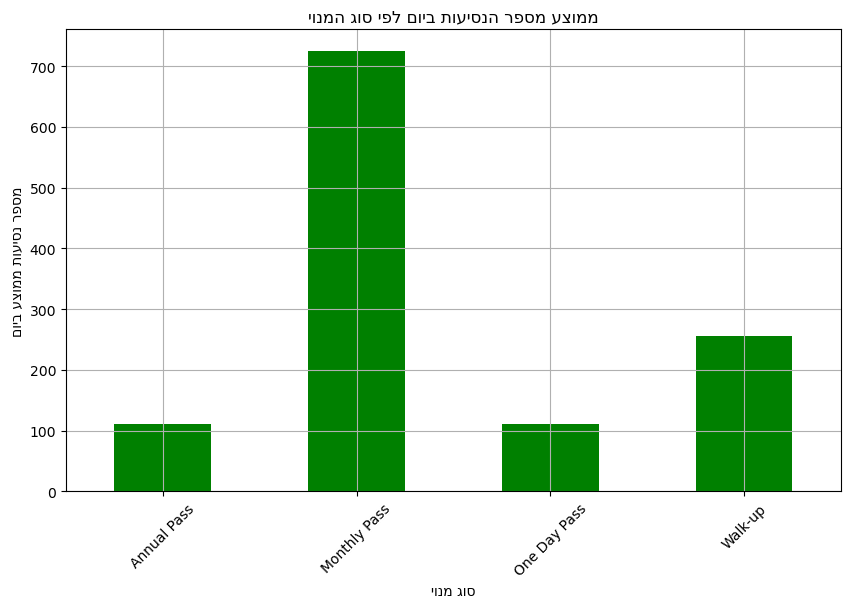

In [18]:
df['day'] = df['start_time'].dt.date

trips_per_day_by_passholder = df.groupby(['day', 'passholder_type']).size().reset_index(name='num_trips')

average_trips_per_day_by_passholder = trips_per_day_by_passholder.groupby('passholder_type')['num_trips'].mean().plot.bar(
    figsize=(10, 6),
    title='ממוצע מספר הנסיעות ביום לפי סוג המנוי'[::-1], 
    xlabel='סוג מנוי'[::-1], 
    ylabel='מספר נסיעות ממוצע ביום'[::-1],
    color=['green'],
    grid=True

)



plt.xticks(rotation=45)

plt.show()

# מסקנה שאלה 14
המסקנה מראה כי למנויים מסוג חודש הממוצע הגבוה יותר של נסיעות ביום. נתון זה יכול לסייע בפיתוח הצעות שיווקיות המותאמות לסוגי מנויים זה והתמחור שלו.



# רשימת מסקנות
1.לחברה קיימם 1,932 יחידות של אופניים הפרוסים בכל רחבי המטרו בלוס אנג׳לס
2.מניתוח הנתונים והצגתם בתרשים עוגה אנו רואים שהחודשים בהם השתמשו הכי הרבה בשירותי החברה הינם חודשי מאי - יוני - תקופה זו הינה תקופת האביב בלוס אנג׳לס - מסקנה זו יכולה להעיד שבעונות נוחות מבחינת מזג אוויר יש יותר אנשים שמשכירים אופניים
3. והחודש בוא כמות השימושים הינה הגבוהה ביותר הוא בחודש יוני
4. מידע זה יכול לעזור בהחלטות עסקיות להוסיף תחנות נוספות או לשדרג תחנות קיימות
5. זה מספק הבנה טובה יותר על דפוסי השימוש ומיקום התחנות הפופולריות
6. פופולרי ולפתח הצעות או מבצעים מותאמים לאותו סוג מנוי.
7. מלאי אופניים מסוג זה ושיפור התחזוקה שלהם במקביל הורדת מלאי האופניים החשמליים שעלותם גבוהה בהרבה ובכך לחסוך כסף.
8. יותר באופניים רגילות משמעותית יותר ממנוי יומי באופניים חשמליים נתון זה יכול לעזור בפיתוח חבילות מנויים מותאמות לפי סוג האופניים המועדף
9.זמן השימוש הממוצע הוא נתון חשוב להבנת דפוסי השימוש של הלקוחות, ויכול לסייע בתכנון תחזוקה ושירותים נוספים.
10.רוב השכרות האופניים מתרחשות בצהריים ובערב. נתון זה יכול לעזור בהבנה מתי להגדיל את זמינות האופניים ולשפר את השירות בשעות העומס.
11.מהניתוח קיבלנו שסוג המסלול הנפוץ ביותר הוא כיוון אחד, נתון זה חשוב לתכנון המסלולים והתחנות בעתיד.
12. כדי להבין מדוע זמן השימושים הממוצעים נמוך - נבדוק מה הזמן הנפוץ ביותר בעמודת duration
13. הרגילים שימוש זמן ממוצע גבוהה יותר במעט מאשר האופניים החשמליים, אפשר להסיק מזה שלמרות שאנשים צריכים לדווש ולהתאמץ יותר להגיע ממקום למקום בעזרתם כנראה שלאופניים חשמליים אין יתרון בחשיבות הדבר ללקוח (בהתחשב ואין הבדלי מחירים בין השניים).
14. המסקנה מראה כי למנויים מסוג חודש הממוצע הגבוה יותר של נסיעות ביום. נתון זה יכול לסייע בפיתוח הצעות שיווקיות המותאמות לסוגי מנויים זה והתמחור שלו.

# סיכום מסקנות:
המסקנות מהניתוח שביצענו על הנתונים של חברת המטרו-בייק בלוס אנג'לס מצביעות על מספר תובנות חשובות. ניתוח הנתונים הראה כי לחברה קיימים 1,932 אופניים הפזורים ברחבי העיר. כמות השימושים בשירותי החברה מגיעה לשיא בחודשי האביב, במיוחד במאי וביוני, מה שמעיד על קשר חיובי בין מזג אוויר נוח לבין עלייה בשימוש בשירותי השכרת אופניים.

זיהוי התחנות הפופולריות ביותר, הן מבחינת תחנות ההתחלה והן מבחינת תחנות הסיום, מספק תובנות חשובות שיכולות לסייע בהחלטות עסקיות להוסיף או לשדרג תחנות במיקומים אסטרטגיים. הבנת פופולריות סוגי המנויים ושימוש האופניים הרגילים מול החשמליים יכולה לעזור בפיתוח הצעות שיווקיות ומבצעים מותאמים אישית למנויים ולשיפור תחזוקת האופניים.

זיהוי הזמן הממוצע לשימוש באופניים והשעות שבהן מתרחשות מרבית ההשכרות מצביעים על כך שרוב השכרות האופניים מתרחשות בשעות הצהריים והערב. נתון זה חשוב לתכנון שיפור זמינות האופניים ושירות הלקוחות בשעות העומס. כמו כן, זמן השימוש הממוצע יכול לסייע בתכנון התחזוקה ושירותים נוספים.

מסקנות נוספות מצביעות על כך שסוג המסלול הנפוץ ביותר הוא כיוון אחד, מה שיכול לסייע בתכנון מסלולים ותחנות בעתיד. בנוסף, זמן השימושים הממוצע נמוך מצביע על הצורך בבדיקת הזמן הנפוץ ביותר בעמודת ה-duration כדי להבין את הדפוסים. המנויים החודשיים הם בעלי ממוצע נסיעות יומי גבוה, נתון שיכול לסייע בפיתוח הצעות שיווקיות מותאמות ותמחור מדויק יותר לסוג מנוי זה.

לסיכום, הניתוח מספק לחברה תובנות מעמיקות על דפוסי השימוש של הלקוחות, ויכול לסייע בקבלת החלטות עסקיות לשיפור השירות, התחזוקה והשיווק. הנתונים מצביעים על הזדמנויות לשיפור בזמינות האופניים בשעות העומס, בשדרוג התחנות הפופולריות, ובפיתוח חבילות מנויים מותאמות אישית שיגדילו את השימוש ואת שביעות רצון הלקוחות.